In [32]:
# January 28th 
# Support Vector Regression is a nonlinear model 
# We will need feature scaling 

# Importing the libraries 
import numpy as np # included for mathematical operations
import matplotlib.pyplot as plt # plot nice charts in Python 
import pandas as pd # import datasets and manage datasets 
import os # Use this for folder and file manipulation

# Importing the dataset 
os.chdir('/Users/amandahutter/Documents/PythonCode/Udemy/MachineLearningA-Z/Part 2 - Regression/Section 7 - Support Vector Regression (SVR)') 
dataset = pd.read_csv('Position_Salaries.csv')
print(dataset)

X = dataset.iloc[:, 1:2].values # take all the rows, take all columns except the final one 
Y = dataset.iloc[:, 2].values

# Splitting the dataset into the Training set and Test set
"""from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)"""

# Feature Scaling
from sklearn.preprocessing import StandardScaler
# Data reshape for feature scaling transform 
Y = Y.reshape(-1, 1)
sc_X = StandardScaler() # make an object to scale X 
sc_Y = StandardScaler() # make an object to scale Y
X = sc_X.fit_transform(X) # using fit transform. This is fitted to X, cannot apply to Y
Y = sc_Y.fit_transform(Y) # using fit transofrm. Fitted to Y, and then scaled. 

            Position  Level   Salary
0   Business Analyst      1    45000
1  Junior Consultant      2    50000
2  Senior Consultant      3    60000
3            Manager      4    80000
4    Country Manager      5   110000
5     Region Manager      6   150000
6            Partner      7   200000
7     Senior Partner      8   300000
8            C-level      9   500000
9                CEO     10  1000000


/Users/amandahutter/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


[ 170370.0204065]


/Users/amandahutter/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


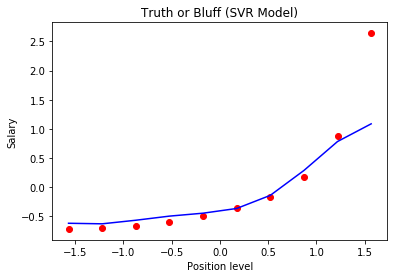

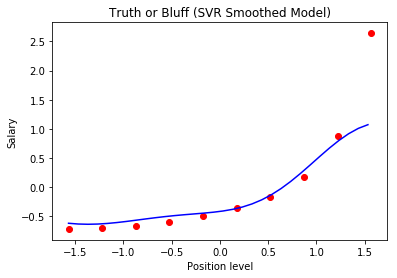

In [33]:
# Fitting the Regression Model to the dataset
from sklearn.svm import SVR 
# https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html
regressor = SVR(kernel = 'rbf') 
regressor.fit(X, Y)

# Predicting a new result, use inverse transform for readability 
Y_Pred = sc_Y.inverse_transform(regressor.predict(sc_X.transform(np.array([[6.5]]))))
print(Y_Pred)

# Visualising the Regression results
plt.scatter(X, Y, color = 'red')
plt.plot(X, regressor.predict(X), color = 'blue')
plt.title('Truth or Bluff (SVR Model)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

# Visualising the Regression results (for higher resolution and smoother curve)
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, Y, color = 'red')
plt.plot(X_grid, regressor.predict(X_grid), color = 'blue')
plt.title('Truth or Bluff (SVR Smoothed Model)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()